Importing the Dependencies



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


Data Collection & Analysis



In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# K-Mean Clustering

Choosing the Annual Income Column & Spending Score column

In [6]:
X = customer_data[['Annual Income (k$)',	'Spending Score (1-100)']]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [7]:
# أهم كود لتفعيل الخوارزمية
from sklearn.cluster import KMeans
# finding wcss value for different number of clusters

wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [10]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

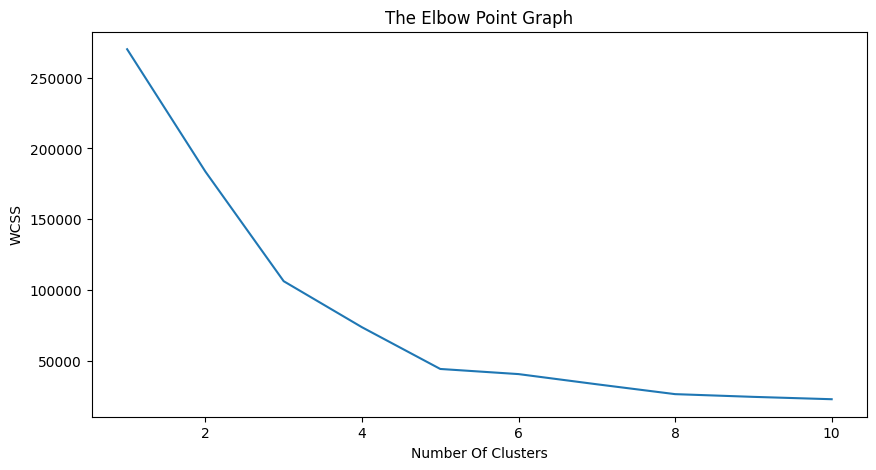

In [11]:
#plot an elbow graph لمعرفة افضل clusters
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss) #plot(x,y) where x is numbers from 1-10,  and y is wcss
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In the graph, as u notice there is a cutoff point like drop in the values in number 3 and 5, so there are two elbow points

Optimum Number of Clusters = 5




**Training the k-Means Clustering Model**


In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init='k-means++', random_state=42)

#return a label for each data ponit based on there cluster
Y = km.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing all the Clusters

In [15]:
#احداثيات كل سينتر
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

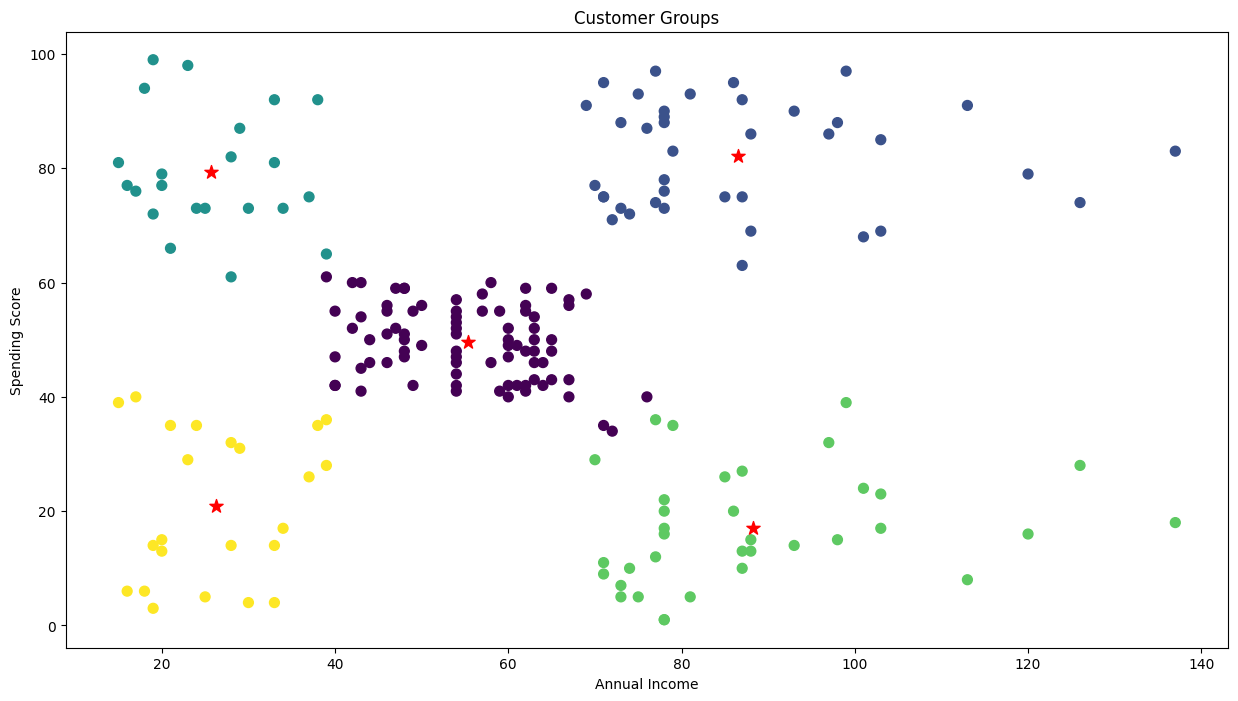

In [13]:
plt.figure(figsize=(15,8))
plt.scatter(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],s=50, c=km.labels_)
#plot the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='red', marker='*')
#kmeans.cluster_centers_[:,0] this is x point coordinate
#kmeans.cluster_centers_[:,1] this is y

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:

km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [16]:
## Validating the k value
## kneelocator
## Silhoutee scoring
## للتاكد من ان عدد 5 هو الصحيح
## kneelocator
!pip install kneed

In [17]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow


5

In [19]:
## silhoutte score طريقة اخرى
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)

In [20]:
silhouette_coefficients

[0.2968969162503008,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.45645416969690844,
 0.4549672872760578,
 0.41883465100093276,
 0.4428876106278084,
 0.44844327163062]

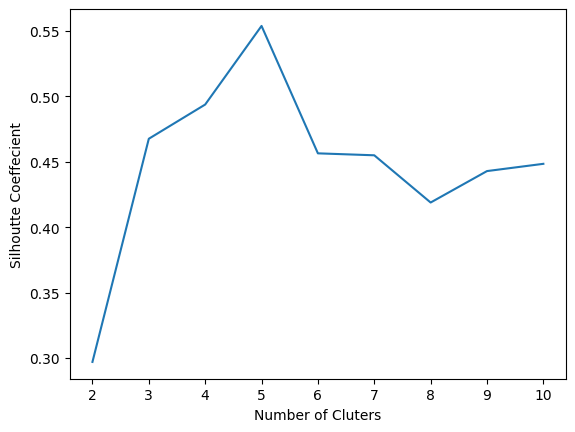

In [21]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

### Model evaluation

In [22]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km.labels_)

0.553931997444648

# Hierarchical Clustering

### Model building

In [23]:
X = customer_data[['Annual Income (k$)',	'Spending Score (1-100)']]

In [24]:
from sklearn.cluster import AgglomerativeClustering

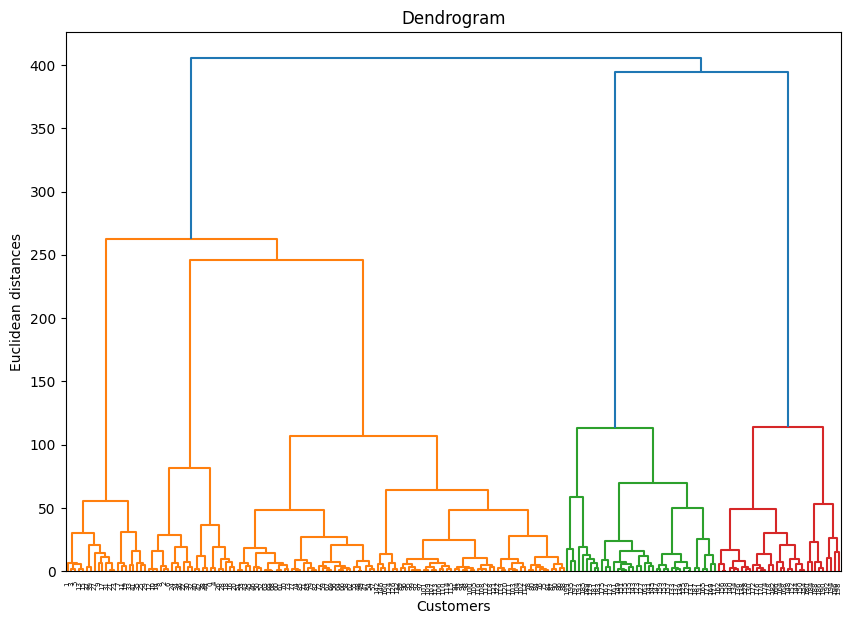

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward")) #الامر الرئيسي
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

In [26]:
# Apply Hierarchical Clustering with optimal clusters (e.g., 5 clusters)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

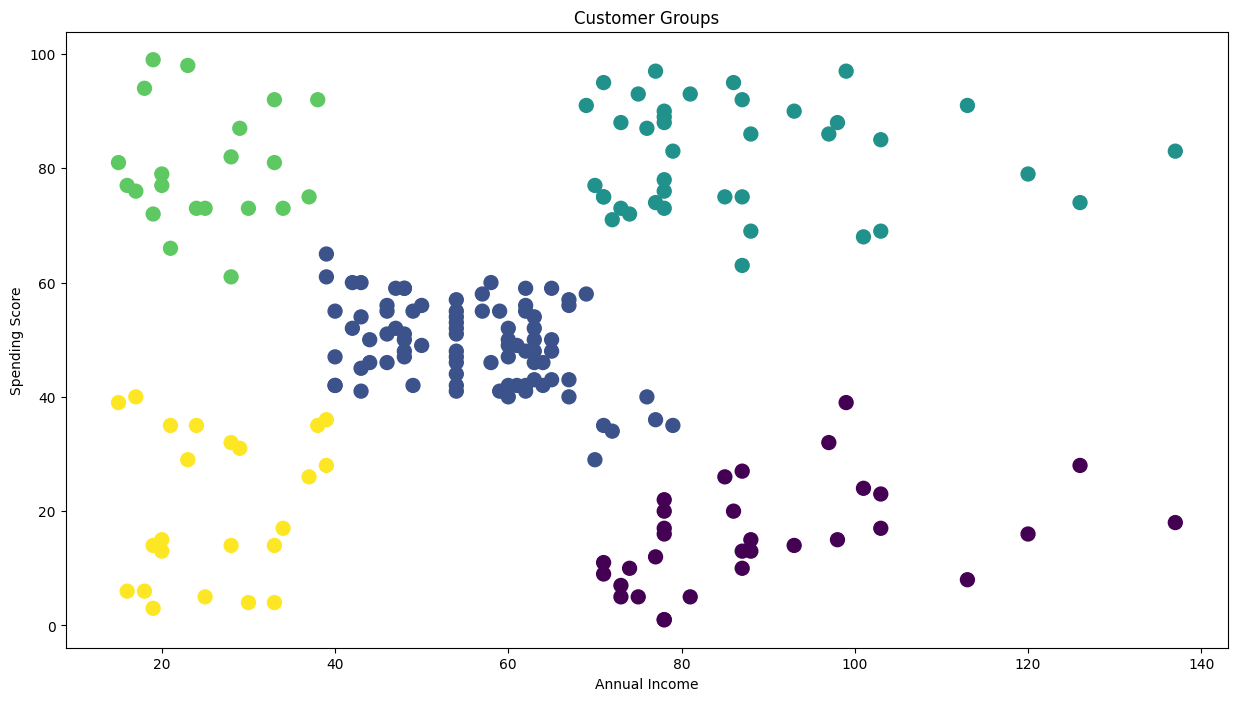

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],s=100, c=hc.labels_)

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

For Customer Age and Spending Score

In [28]:
X = customer_data[['Age', 'Spending Score (1-100)']]


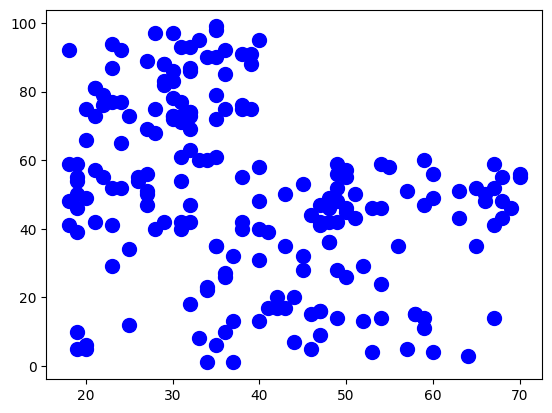

In [29]:
plt.scatter(X[["Age"]], X[["Spending Score (1-100)"]], s=100, c='blue')

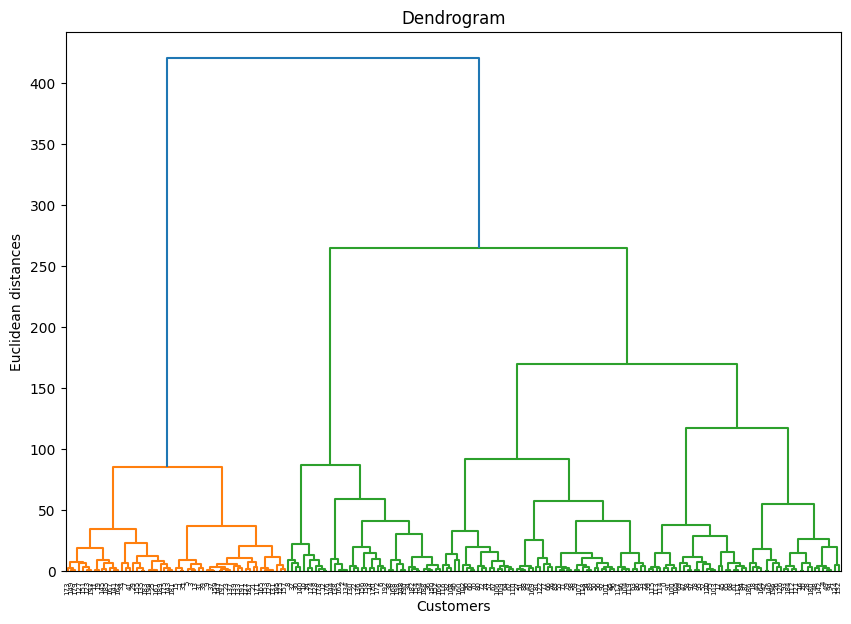

In [30]:
# Plotting the Dendrogram to find optimal clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
# Apply Hierarchical Clustering with optimal clusters (e.g., 4 clusters)
hc = AgglomerativeClustering(n_clusters=3,  linkage='ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=3)

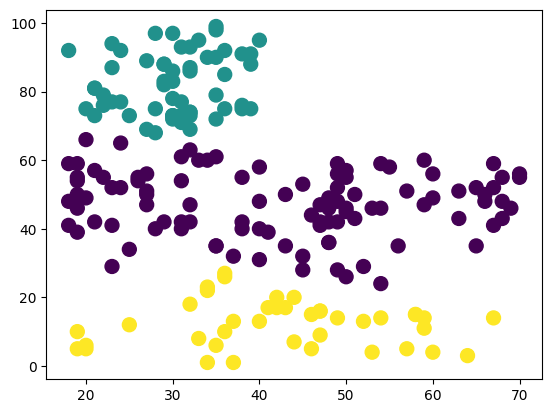

In [32]:
plt.scatter(X[["Age"]], X[["Spending Score (1-100)"]], s=100, c=hc.labels_)

# DBSCAN

In [33]:
X = customer_data[['Age', 'Spending Score (1-100)']]


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.33, min_samples=5)
dbscan.fit(data_scaled)



DBSCAN(eps=0.33)

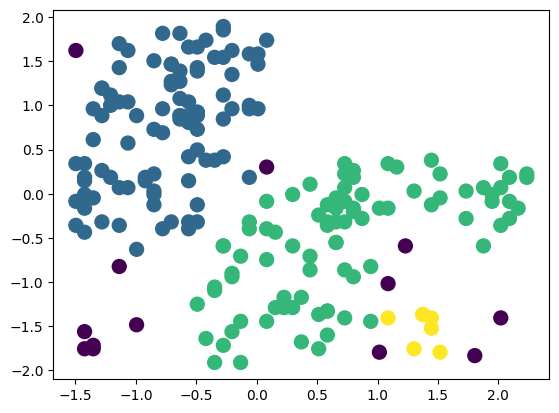

In [35]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=100, c=dbscan.labels_)

In [36]:
dbscan.labels_

array([ 0,  0, -1,  0,  0,  0,  1,  0, -1,  0, -1,  0,  2,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  2,  0,  1,  0,  1,  0,  2,  0, -1, -1,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,
        1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1, -1,  0, -1,  0,  1,  0,  2,  0,  1,  0,  0,  0, -1,  0,
        1,  0, -1,  0,  2,  0,  0,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0])

In [37]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=250,noise=0.05)

In [38]:
X

array([[ 5.33342203e-02,  4.40510782e-01],
       [ 1.88386463e+00,  1.95932611e-01],
       [ 1.59004530e+00, -3.48788103e-01],
       [ 3.63492683e-01, -2.23111918e-01],
       [ 1.57725709e-01, -1.38132652e-01],
       [-9.78996224e-01,  4.74240593e-01],
       [ 1.92151314e-02,  2.18529695e-01],
       [ 1.02579793e-01,  4.13904213e-02],
       [ 6.71258547e-02, -4.26744332e-02],
       [-8.02328412e-02,  9.43396893e-01],
       [ 9.01838467e-01,  2.69226146e-01],
       [-9.75136870e-01,  2.03257788e-01],
       [ 1.97832406e+00, -2.01353386e-02],
       [ 1.67839824e-01,  1.16510809e-01],
       [ 1.73196270e+00, -2.09644320e-01],
       [ 9.64509075e-01,  4.89048972e-01],
       [-9.58018278e-01,  2.21652172e-01],
       [ 1.24423067e+00, -4.26614016e-01],
       [ 9.58117979e-01,  3.08072196e-01],
       [ 1.87270521e+00,  7.69159894e-02],
       [-8.33058308e-02,  1.08835926e+00],
       [ 1.06962363e+00,  2.53772566e-01],
       [-2.68980872e-01,  1.00642205e+00],
       [ 3.

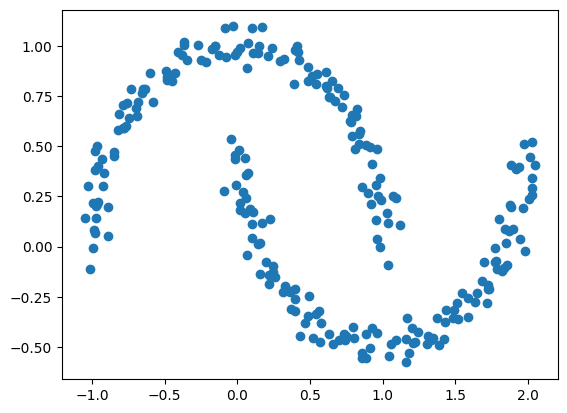

In [39]:
plt.scatter(X[:,0],X[:,1])

In [40]:
##feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [41]:
X_scaled=scaler.fit_transform(X)

In [42]:
X_scaled

array([[-5.21517231e-01,  3.79134760e-01],
       [ 1.58970046e+00, -1.15359459e-01],
       [ 1.25082787e+00, -1.21668933e+00],
       [-1.63800129e-01, -9.62594094e-01],
       [-4.01118707e-01, -7.90780904e-01],
       [-1.71214170e+00,  4.47330531e-01],
       [-5.60868024e-01, -6.96721127e-02],
       [-4.64720511e-01, -4.27816696e-01],
       [-5.05610834e-01, -5.97781107e-01],
       [-6.75565009e-01,  1.39588239e+00],
       [ 4.57093758e-01,  3.28272291e-02],
       [-1.70769056e+00, -1.00549234e-01],
       [ 1.69864397e+00, -5.52211005e-01],
       [-3.89453729e-01, -2.75936431e-01],
       [ 1.41450640e+00, -9.35364970e-01],
       [ 5.29374063e-01,  4.77270478e-01],
       [-1.68794706e+00, -6.33590124e-02],
       [ 8.51987206e-01, -1.37403969e+00],
       [ 5.22002977e-01,  1.11367138e-01],
       [ 1.57682989e+00, -3.55990220e-01],
       [-6.79109200e-01,  1.68897089e+00],
       [ 6.50606529e-01,  1.58279878e-03],
       [-8.93255017e-01,  1.52330821e+00],
       [-1.

In [43]:
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [44]:
dbcan.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0])

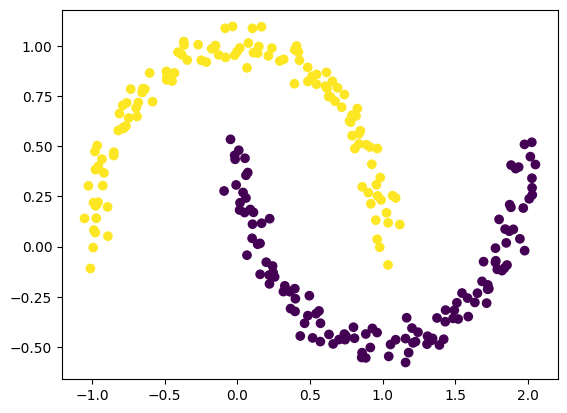

In [45]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)